In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1CcOQq44Ed7kby_UDd1I2oT8Pod9Ptl-u"})   # replace the id with id of file you want to access
downloaded.GetContentFile('auto-mpg.csv')        # replace the file name with your file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cars=pd.read_csv('auto-mpg.csv')

In [ ]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
cars['car name'] = cars['car name'].apply(lambda x:x.split(' ')[0])  # Save only the brand name in car name column

In [ ]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


In [ ]:
cars['car name'].unique()  # Find unique car brand names

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
#correct errors in data entry
cars['car name'].replace('maxda','mazda', inplace=True)
cars['car name'].replace('toyouta','toyota', inplace=True)
cars['car name'].replace('vokswagen','volkswagen', inplace=True)
cars['car name'].replace('vw','volkswagen', inplace=True)
cars['car name'].replace('chevy','chevrolet', inplace=True)

In [ ]:
cars['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'chevroelt', 'capri', 'mercedes-benz', 'cadillac', 'mercedes',
       'triumph', 'nissan'], dtype=object)

In [ ]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,volkswagen
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


In [ ]:
#Convert text categories of brand names to codes
cars['car name']= cars['car name'].astype('category').cat.codes

In [ ]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,7
1,15.0,8,350.0,165,3693,11.5,70,1,3
2,18.0,8,318.0,150,3436,11.0,70,1,23
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,12
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,12
394,44.0,4,97.0,52,2130,24.6,82,2,30
395,32.0,4,135.0,84,2295,11.6,82,1,10
396,28.0,4,120.0,79,2625,18.6,82,1,12


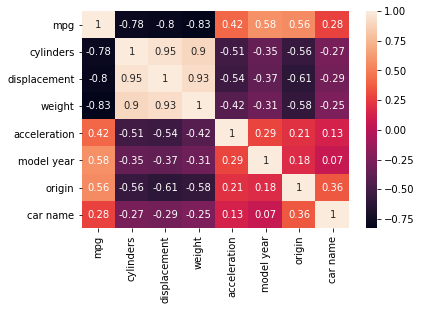

In [ ]:
import seaborn as sns
correlation_matrix=cars.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
#From the correlation matrix identify strongest correlators to mpg

Text(0, 0.5, 'mpg')

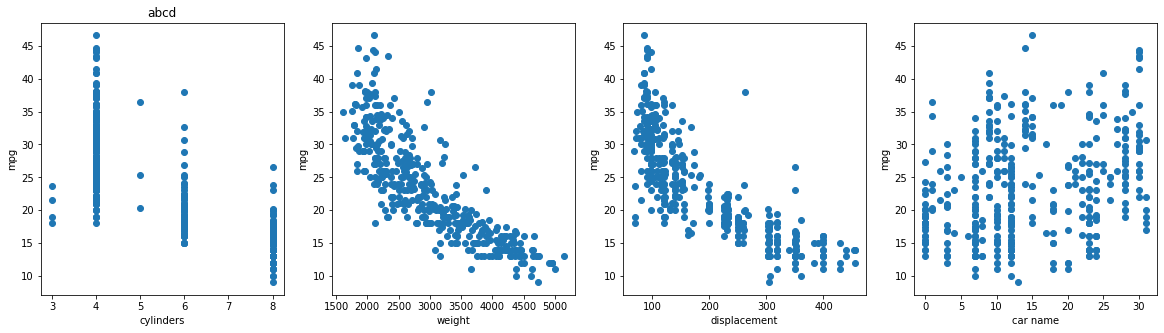

In [ ]:
#Strong correlation of mpg with cylinder, displacement and weight very small correlation with brand name
import matplotlib.pyplot as plt
plt.figure(figsize = [20,5])
plt.subplot(1,4,1)
plt.scatter(cars['cylinders'],cars['mpg'])
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('abcd')


plt.subplot(1,4,2)
plt.scatter(cars['weight'],cars['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')

plt.subplot(1,4,3)
plt.scatter(cars['displacement'],cars['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')

plt.subplot(1,4,4)
plt.scatter(cars['car name'],cars['mpg'])
plt.xlabel('car name')
plt.ylabel('mpg')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


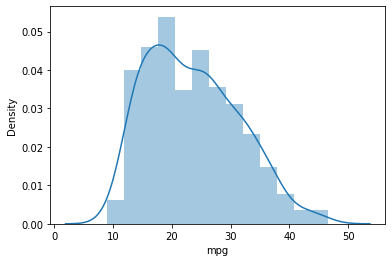

In [ ]:
#Distribution of mpg
sns.distplot(cars['mpg'])

In [ ]:
#Create the training set
#Shuffle and copy 200 rows. Extract the mpg row as the target (train_sety)
from sklearn.utils import shuffle
cars = shuffle(cars)
train_Set = cars[:200]
train_sety = train_Set['mpg'];
train_setx = train_Set.drop(columns = ['mpg'])

In [ ]:
train_setx

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
164,6,231.0,110,3039,15.0,75,1,3
202,6,258.0,95,3193,17.8,76,1,0
343,4,79.0,58,1755,16.9,81,3,28
372,4,151.0,90,2735,18.0,82,1,24
182,4,107.0,86,2464,15.5,76,2,11
...,...,...,...,...,...,...,...,...
148,4,116.0,75,2246,14.0,74,2,11
115,8,350.0,145,4082,13.0,73,1,7
251,8,302.0,139,3570,12.8,78,1,18
385,4,91.0,67,1995,16.2,82,3,9


In [ ]:
#Create the test set
#copy alls rows after 200. Extract the mpg row as the target (test_sety)
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

In [ ]:
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);

In [ ]:
import numpy as np
X1 = train_setx['weight'];
X2 = np.square(train_setx['weight'])

M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;

M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

Y = train_sety
L = len(X1)
alpha = 0.5;

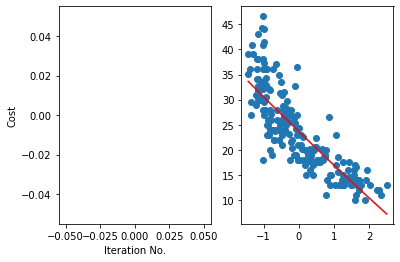

Error =  686.3331608325415 theta0 =  23.7675 theta1 =  -7.440103238636283 theta2 =  0.7001723426546178 



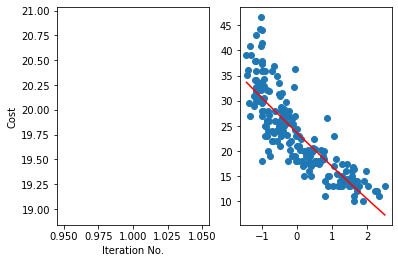

Error =  19.935808016689073 theta0 =  23.767500000000002 theta1 =  -7.611436628859234 theta2 =  0.8702256542091082 



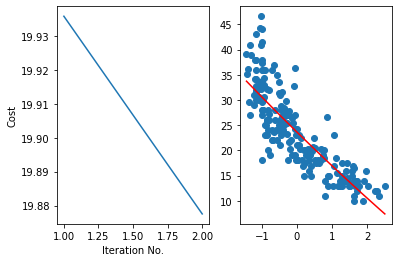

Error =  19.87753475731314 theta0 =  23.767500000000002 theta1 =  -7.780219425563474 theta2 =  1.0377474284274029 



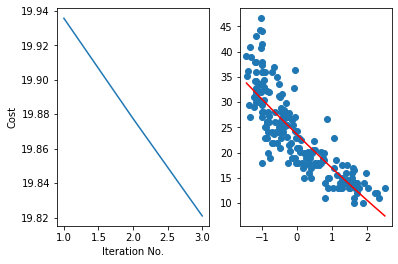

Error =  19.820983580012587 theta0 =  23.767500000000002 theta1 =  -7.946489598740077 theta2 =  1.2027753516163777 



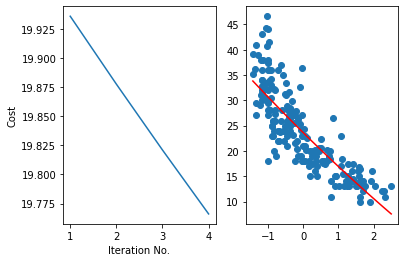

Error =  19.76610359409235 theta0 =  23.767500000000002 theta1 =  -8.110284553131203 theta2 =  1.365346549057123 



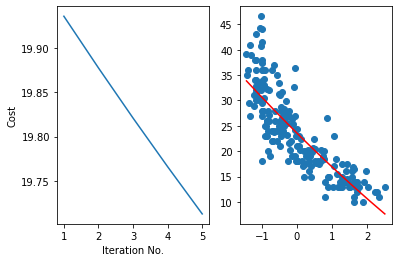

Error =  19.71284541277104 theta0 =  23.767500000000002 theta1 =  -8.271641136644801 theta2 =  1.5254975933567783 



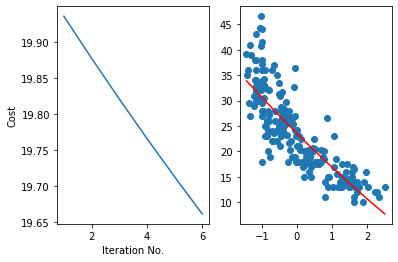

Error =  19.661161108737584 theta0 =  23.767500000000002 theta1 =  -8.43059564864405 theta2 =  1.6832645126760424 



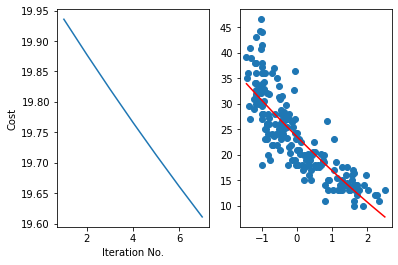

Error =  19.611004171021175 theta0 =  23.767500000000002 theta1 =  -8.587183848113398 theta2 =  1.8386827988341978 



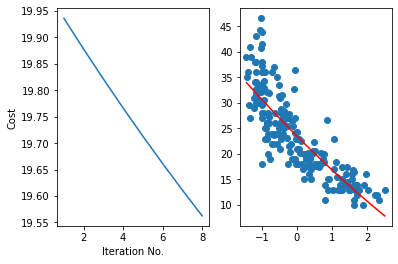

Error =  19.562329463135786 theta0 =  23.767500000000002 theta1 =  -8.741440961703026 theta2 =  1.9917874152934791 



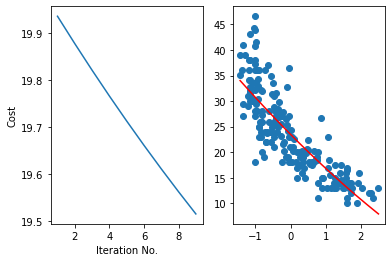

Error =  19.51509318246164 theta0 =  23.767500000000002 theta1 =  -8.893401691653569 theta2 =  2.1426128050245805 



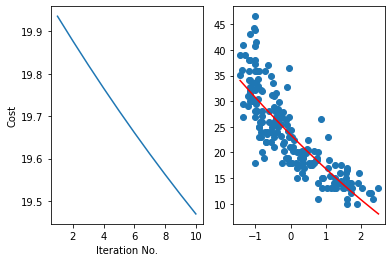

Error =  19.469252820826995 theta0 =  23.767500000000002 theta1 =  -9.043100223602856 theta2 =  2.29119289825507 



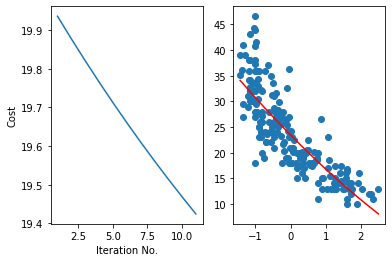

Error =  19.424767126254846 theta0 =  23.767500000000002 theta1 =  -9.19057023427644 theta2 =  2.4375611201024623 



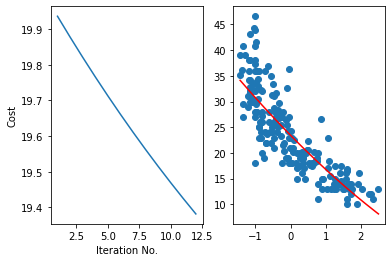

Error =  19.381596065840014 theta0 =  23.767500000000002 theta1 =  -9.335844899063625 theta2 =  2.5817503980936483 



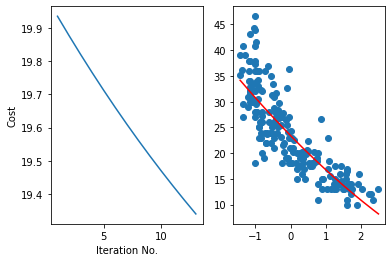

Error =  19.339700789723363 theta0 =  23.767500000000002 theta1 =  -9.478956899480737 theta2 =  2.723793169572394 



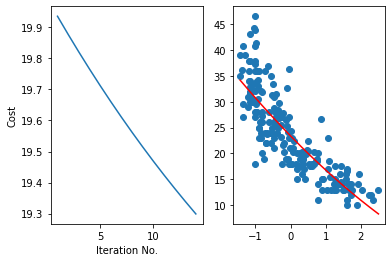

Error =  19.299043596130613 theta0 =  23.767500000000002 theta1 =  -9.619938430523264 theta2 =  2.863721388996564 



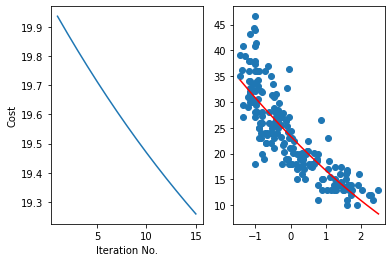

Error =  19.259587897444298 theta0 =  23.767500000000002 theta1 =  -9.758821207908566 theta2 =  3.001566535126707 



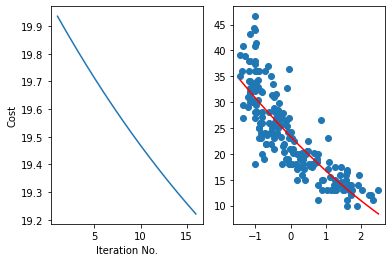

Error =  19.2212981872784 theta0 =  23.767500000000002 theta1 =  -9.895636475210758 theta2 =  3.1373596181076433 



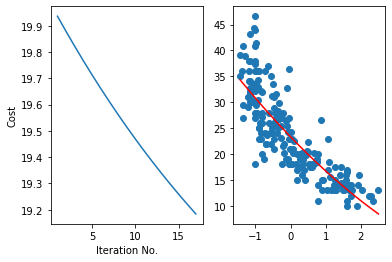

Error =  19.18414000852597 theta0 =  23.767500000000002 theta1 =  -10.03041501088937 theta2 =  3.271131186444607 



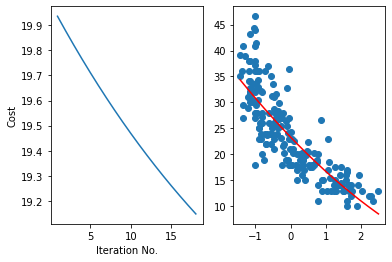

Error =  19.148079922350963 theta0 =  23.767500000000002 theta1 =  -10.163187135213397 theta2 =  3.4029113338755574 



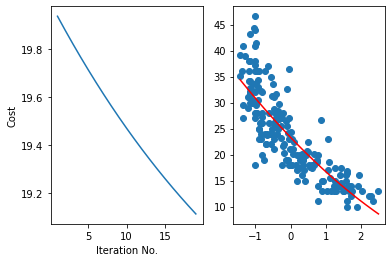

Error =  19.113085478096522 theta0 =  23.767500000000002 theta1 =  -10.293982717082237 theta2 =  3.5327297061411707 



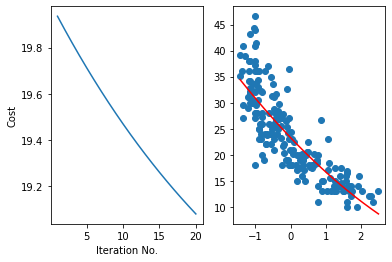

Error =  19.07912518408242 theta0 =  23.767500000000002 theta1 =  -10.422831180745124 theta2 =  3.660615507654058 



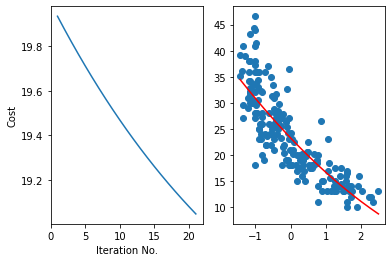

Error =  19.046168479265543 theta0 =  23.767500000000002 theta1 =  -10.549761512420504 theta2 =  3.7865975080686907 



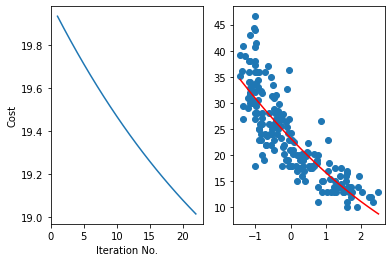

Error =  19.014185705737848 theta0 =  23.767500000000002 theta1 =  -10.674802266816886 theta2 =  3.9107040487535314 



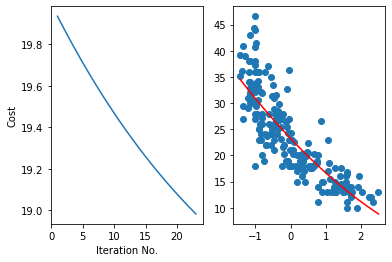

Error =  18.983148082037072 theta0 =  23.767500000000002 theta1 =  -10.797981573556608 theta2 =  4.032963049166809 



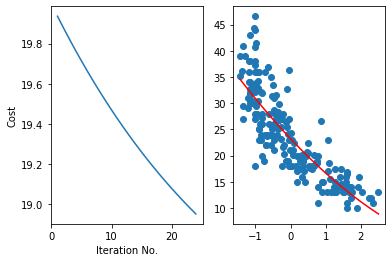

Error =  18.953027677246148 theta0 =  23.767500000000002 theta1 =  -10.919327143503981 theta2 =  4.153402013137379 



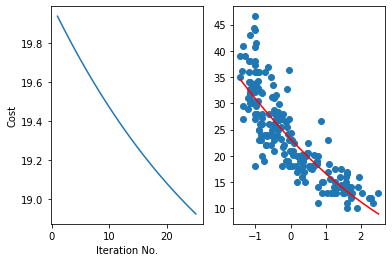

Error =  18.923797385857984 theta0 =  23.767500000000002 theta1 =  -11.038866274999224 theta2 =  4.272048035052088 



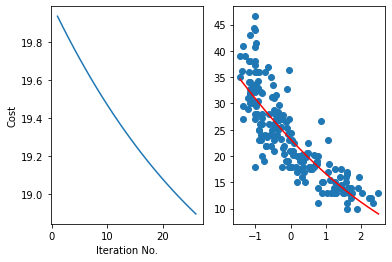

Error =  18.89543090338316 theta0 =  23.767500000000002 theta1 =  -11.156625859999606 theta2 =  4.388927805951029 



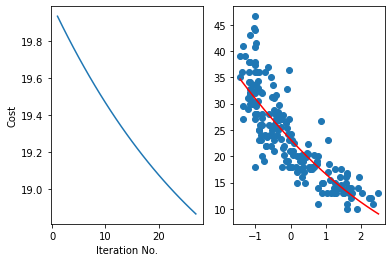

Error =  18.86790270267831 theta0 =  23.767500000000002 theta1 =  -11.272632390129145 theta2 =  4.504067619532044 



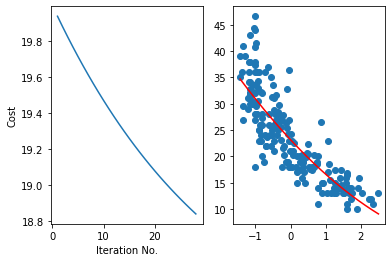

Error =  18.841188010974143 theta0 =  23.767500000000002 theta1 =  -11.386911962638273 theta2 =  4.617493378065861 



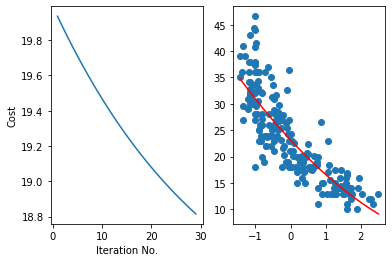

Error =  18.815262787582302 theta0 =  23.767500000000002 theta1 =  -11.499490286274757 theta2 =  4.729230598223153 



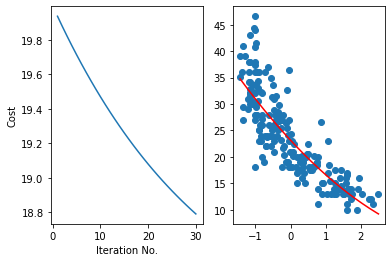

Error =  18.790103702261028 theta0 =  23.767500000000002 theta1 =  -11.61039268706724 theta2 =  4.839304416814871 



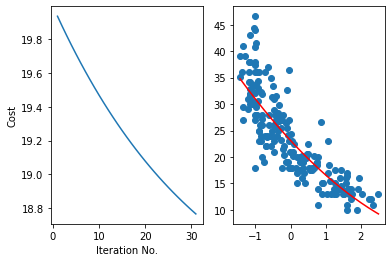

Error =  18.765688114220126 theta0 =  23.767500000000002 theta1 =  -11.719644114022675 theta2 =  4.947739596447104 



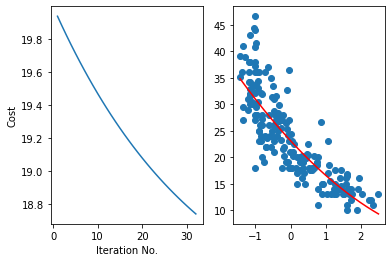

Error =  18.741994051746452 theta0 =  23.767500000000002 theta1 =  -11.827269144738942 theta2 =  5.05456053109177 



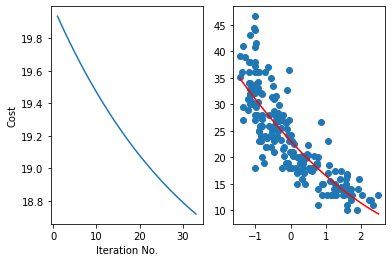

Error =  18.719000192431412 theta0 =  23.767500000000002 theta1 =  -11.933291990933915 theta2 =  5.15979125157437 



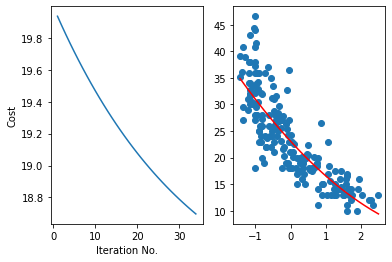

Error =  18.696685843982845 theta0 =  23.767500000000002 theta1 =  -12.037736503892217 theta2 =  5.2634554309800485 



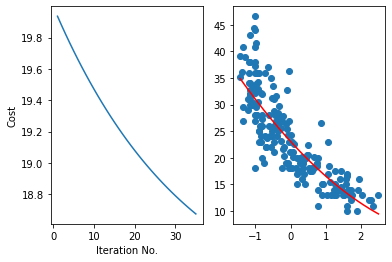

Error =  18.675030925603895 theta0 =  23.767500000000002 theta1 =  -12.140626179830896 theta2 =  5.365576389979182 



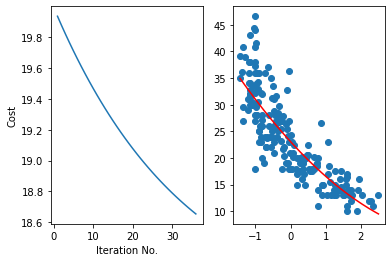

Error =  18.65401594992223 theta0 =  23.767500000000002 theta1 =  -12.24198416518521 theta2 =  5.466177102073676 



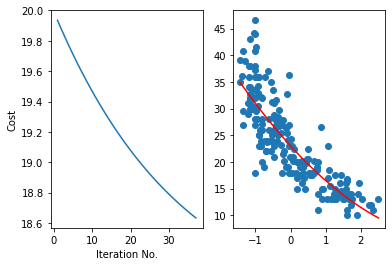

Error =  18.633622005453223 theta0 =  23.767500000000002 theta1 =  -12.341833261815745 theta2 =  5.565280198765171 



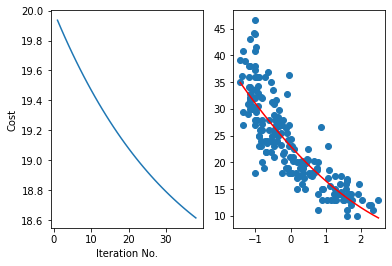

Error =  18.613830739581445 theta0 =  23.767500000000002 theta1 =  -12.440195932137994 theta2 =  5.662907974646305 



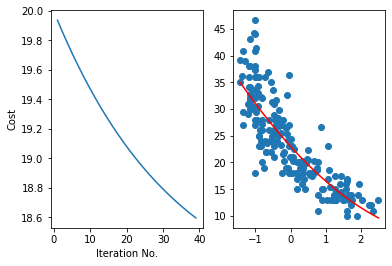

Error =  18.594624342045023 theta0 =  23.767500000000002 theta1 =  -12.537094304175591 theta2 =  5.759082392416186 



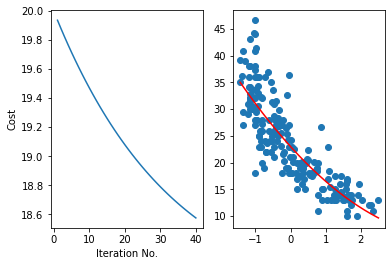

Error =  18.57598552890811 theta0 =  23.767500000000002 theta1 =  -12.632550176538308 theta2 =  5.853825087821207 



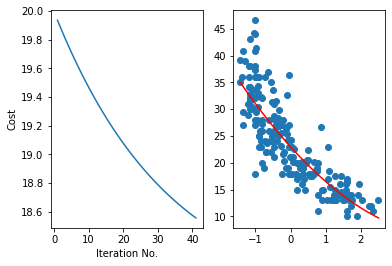

Error =  18.557897527006975 theta0 =  23.767500000000002 theta1 =  -12.726585023325947 theta2 =  5.947157374522291 



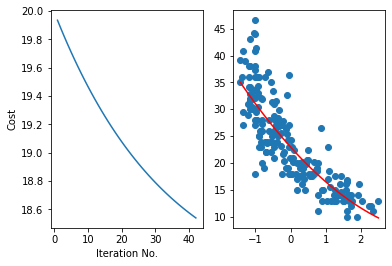

Error =  18.540344058855744 theta0 =  23.767500000000002 theta1 =  -12.819219998959241 theta2 =  6.039100248889701 



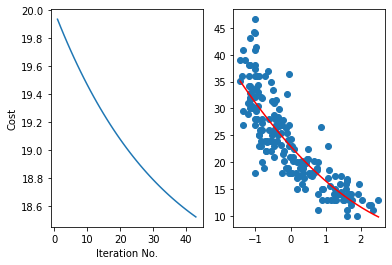

Error =  18.523309327998223 theta0 =  23.767500000000002 theta1 =  -12.910475942938817 theta2 =  6.129674394726448 



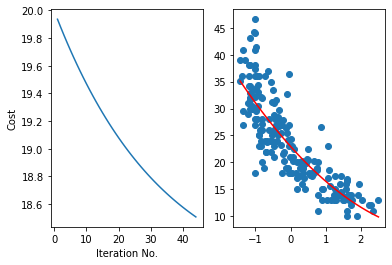

Error =  18.506778004792565 theta0 =  23.767500000000002 theta1 =  -13.000373384533331 theta2 =  6.2189001879214025 



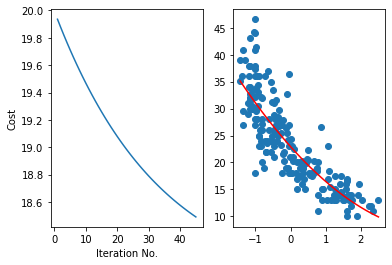

Error =  18.490735212616055 theta0 =  23.767500000000002 theta1 =  -13.088932547397814 theta2 =  6.306797701033131 



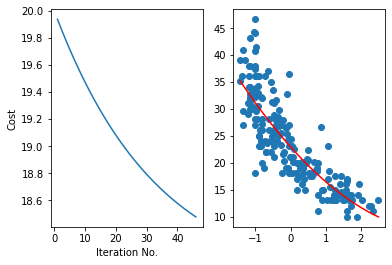

Error =  18.475166514477575 theta0 =  23.767500000000002 theta1 =  -13.176173354123247 theta2 =  6.393386707805482 



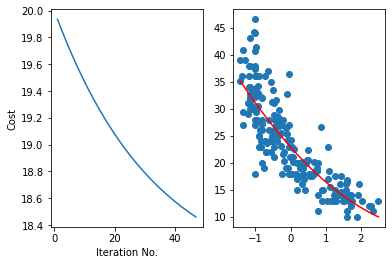

Error =  18.460057900025646 theta0 =  23.767500000000002 theta1 =  -13.262115430718426 theta2 =  6.478686687615968 



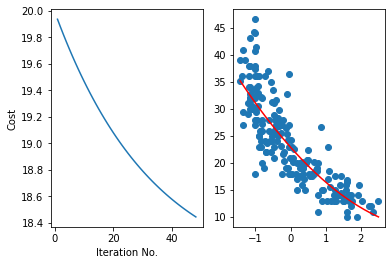

Error =  18.445395772940483 theta0 =  23.767500000000002 theta1 =  -13.346778111025099 theta2 =  6.562716829857911 



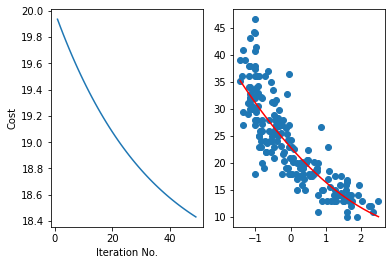

Error =  18.431166938698574 theta0 =  23.767500000000002 theta1 =  -13.430180441067378 theta2 =  6.645496038257361 



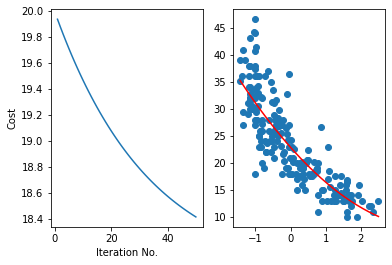

Error =  18.417358592698854 theta0 =  23.767500000000002 theta1 =  -13.512341183336401 theta2 =  6.727042935125751 



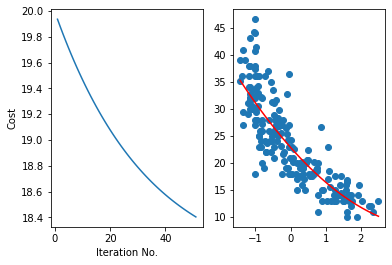

Error =  18.403958308739792 theta0 =  23.767500000000002 theta1 =  -13.593278821011213 theta2 =  6.807375865549229 



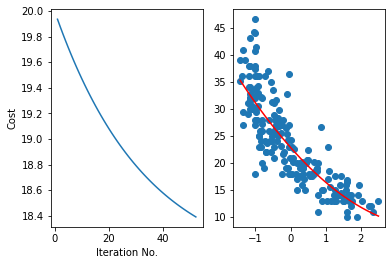

Error =  18.390954027836987 theta0 =  23.767500000000002 theta1 =  -13.673011562116798 theta2 =  6.886512901515645 



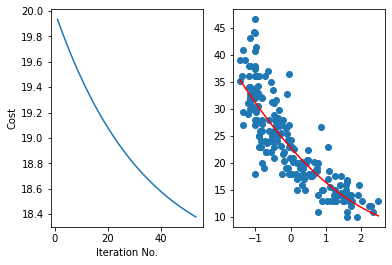

Error =  18.378334047371233 theta0 =  23.767500000000002 theta1 =  -13.75155734362024 theta2 =  6.964471845980087 



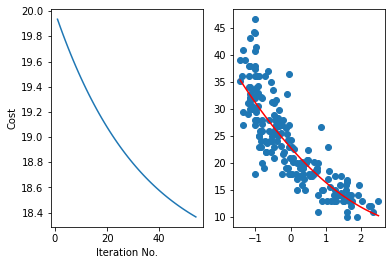

Error =  18.36608701055723 theta0 =  23.767500000000002 theta1 =  -13.828933835465874 theta2 =  7.0412702368699 



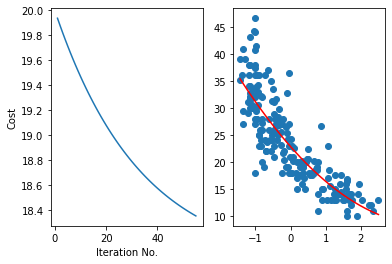

Error =  18.354201896223632 theta0 =  23.767500000000002 theta1 =  -13.905158444550386 theta2 =  7.116925351030079 



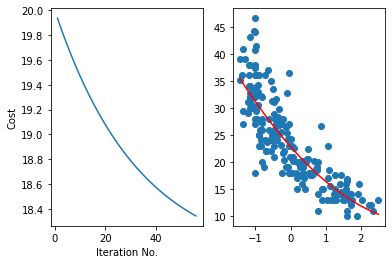

Error =  18.342668008894954 theta0 =  23.767500000000002 theta1 =  -13.980248318638736 theta2 =  7.191454208109936 



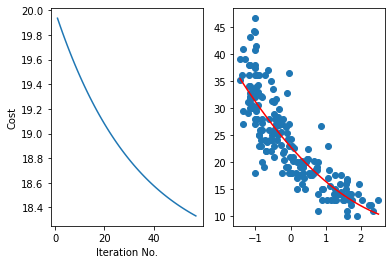

Error =  18.331474969166724 theta0 =  23.767500000000002 theta1 =  -14.054220350221772 theta2 =  7.264873574391895 



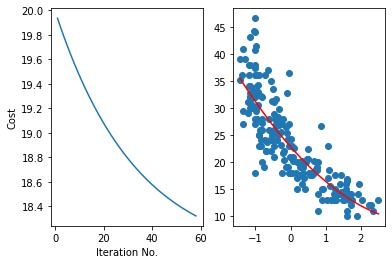

Error =  18.320612704364958 theta0 =  23.767500000000002 theta1 =  -14.127091180316436 theta2 =  7.337199966563302 



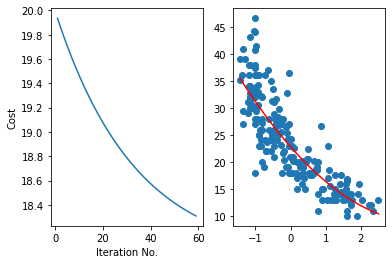

Error =  18.31007143948174 theta0 =  23.767500000000002 theta1 =  -14.198877202209378 theta2 =  7.4084496554320785 



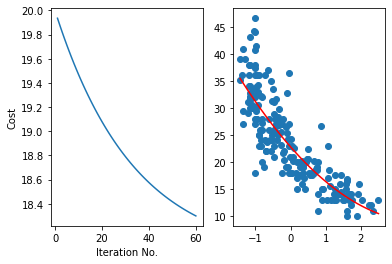

Error =  18.299841688378624 theta0 =  23.767500000000002 theta1 =  -14.269594565144857 theta2 =  7.478638669587056 



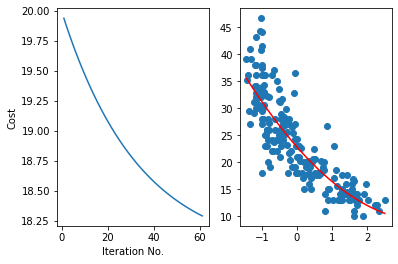

Error =  18.28991424525003 theta0 =  23.767500000000002 theta1 =  -14.33925917795773 theta2 =  7.547782799003831 



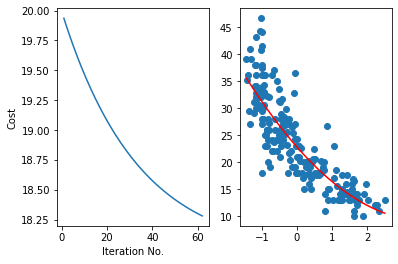

Error =  18.28028017633886 theta0 =  23.767500000000002 theta1 =  -14.407886712652363 theta2 =  7.615897598596932 



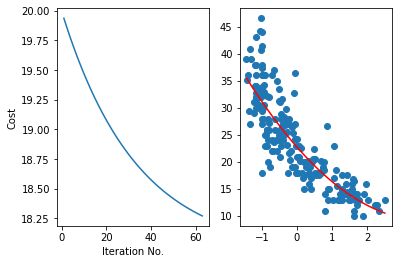

Error =  18.27093081189699 theta0 =  23.767500000000002 theta1 =  -14.475492607928262 theta2 =  7.682998391719115 



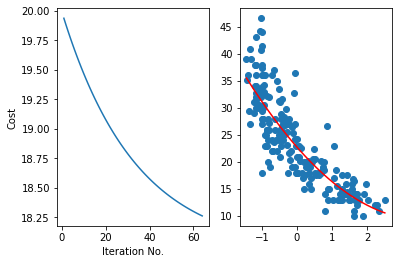

Error =  18.26185773838331 theta0 =  23.767500000000002 theta1 =  -14.542092072653213 theta2 =  7.749100273608554 



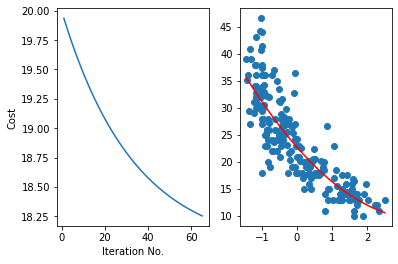

Error =  18.253052790892333 theta0 =  23.767500000000002 theta1 =  -14.607700089284737 theta2 =  7.8142181147847225 



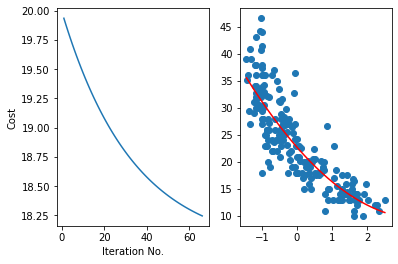

Error =  18.244508045806562 theta0 =  23.767500000000002 theta1 =  -14.672331417240585 theta2 =  7.878366564393723 



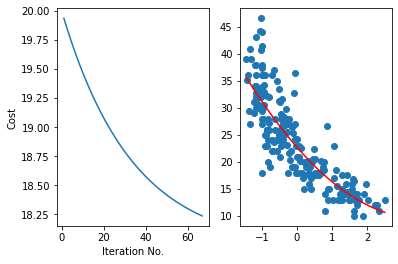

Error =  18.23621581366599 theta0 =  23.767500000000002 theta1 =  -14.736000596219077 theta2 =  7.9415600535038084 



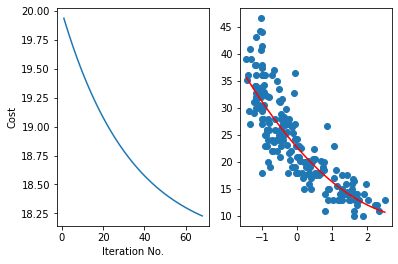

Error =  18.228168632248284 theta0 =  23.767500000000002 theta1 =  -14.798721949470005 theta2 =  8.00381279835185 



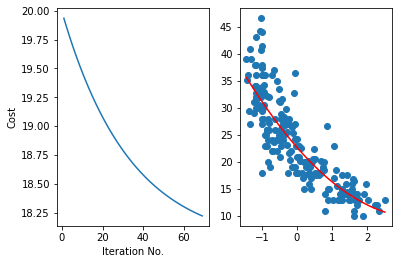

Error =  18.22035925985354 theta0 =  23.767500000000002 theta1 =  -14.86050958701684 theta2 =  8.06513880354147 



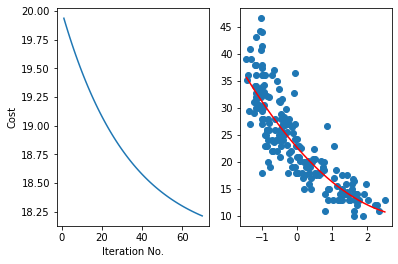

Error =  18.21278066878741 theta0 =  23.767500000000002 theta1 =  -14.921377408830978 theta2 =  8.125551865193572 



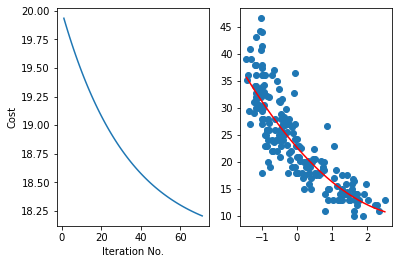

Error =  18.20542603903683 theta0 =  23.767500000000002 theta1 =  -14.981339107958725 theta2 =  8.185065574049963 



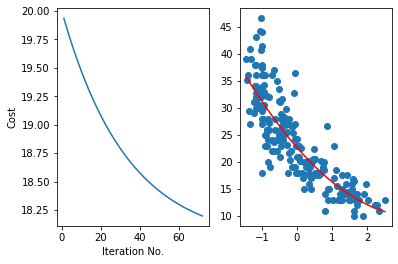

Error =  18.198288752132697 theta0 =  23.767500000000002 theta1 =  -15.040408173601735 theta2 =  8.24369331853078 



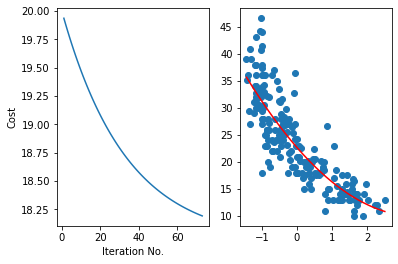

Error =  18.191362385193855 theta0 =  23.767500000000002 theta1 =  -15.098597894151595 theta2 =  8.3014482877464 



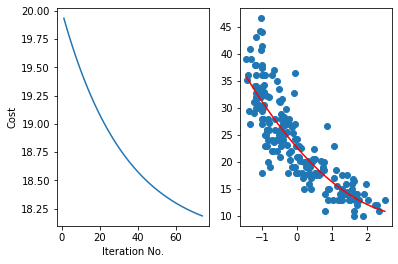

Error =  18.184640705147086 theta0 =  23.767500000000002 theta1 =  -15.155921360179223 theta2 =  8.358343474464496 



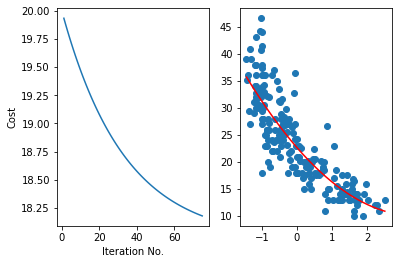

Error =  18.178117663117977 theta0 =  23.767500000000002 theta1 =  -15.21239146737977 theta2 =  8.414391678032956 



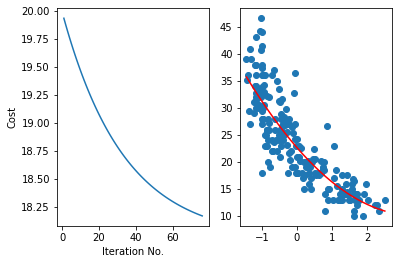

Error =  18.171787388987486 theta0 =  23.767500000000002 theta1 =  -15.268020919473692 theta2 =  8.469605507259256 



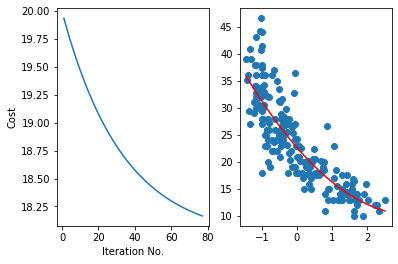

Error =  18.165644186109386 theta0 =  23.767500000000002 theta1 =  -15.322822231064611 theta2 =  8.523997383246995 



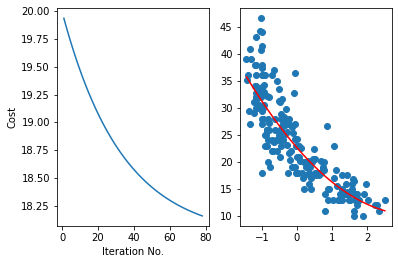

Error =  18.159682526183833 theta0 =  23.767500000000002 theta1 =  -15.37680773045466 theta2 =  8.577579542190177 



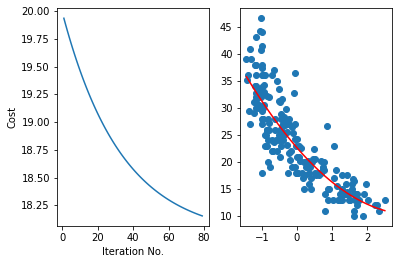

Error =  18.153897044282427 theta0 =  23.767500000000002 theta1 =  -15.429989562417889 theta2 =  8.630364038125927 



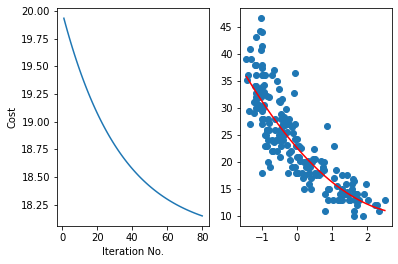

Error =  18.14828253402027 theta0 =  23.767500000000002 theta1 =  -15.482379690932408 theta2 =  8.682362745646195 



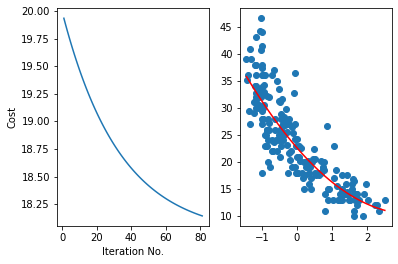

Error =  18.142833942870727 theta0 =  23.767500000000002 theta1 =  -15.533989901871841 theta2 =  8.733587362569118 



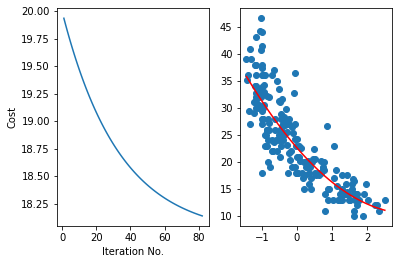

Error =  18.13754636761861 theta0 =  23.767500000000002 theta1 =  -15.584831805656727 theta2 =  8.784049412570603 



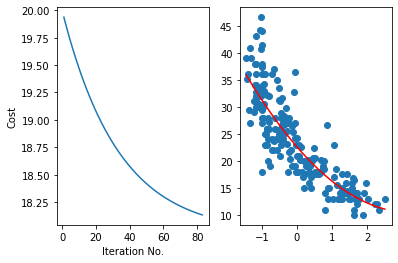

Error =  18.132415049947788 theta0 =  23.767500000000002 theta1 =  -15.63491683986643 theta2 =  8.833760247776729 



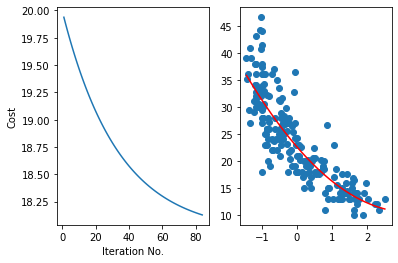

Error =  18.12743537215911 theta0 =  23.767500000000002 theta1 =  -15.684256271812187 theta2 =  8.882731051317563 



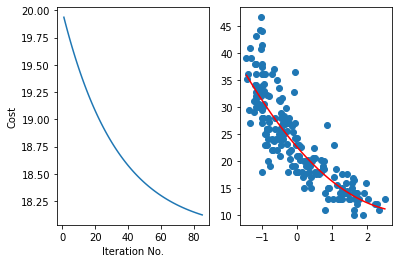

Error =  18.122602853014943 theta0 =  23.767500000000002 theta1 =  -15.73286120107184 theta2 =  8.930972839842966 



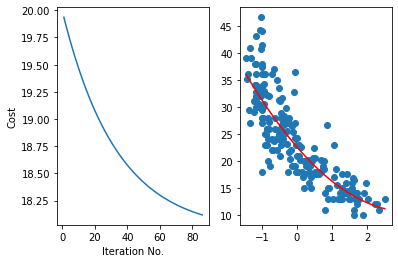

Error =  18.117913143706478 theta0 =  23.767500000000002 theta1 =  -15.780742561986843 theta2 =  8.978496466000928 



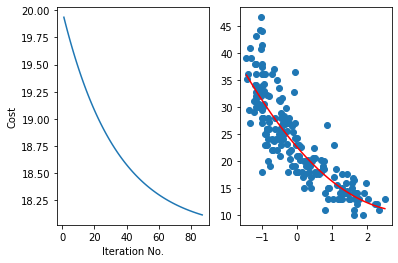

Error =  18.113362023940205 theta0 =  23.767500000000002 theta1 =  -15.827911126122082 theta2 =  9.02531262087903 



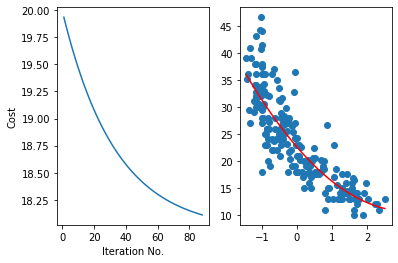

Error =  18.108945398140055 theta0 =  23.767500000000002 theta1 =  -15.874377504689091 theta2 =  9.071431836409536 



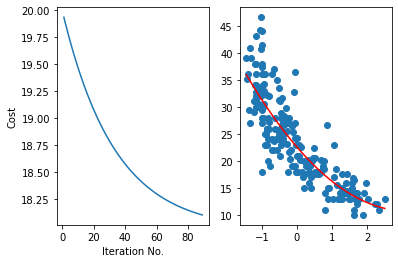

Error =  18.10465929176177 theta0 =  23.767500000000002 theta1 =  -15.920152150933191 theta2 =  9.116864487738708 



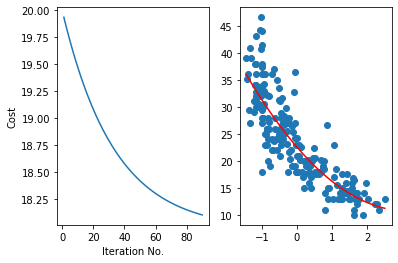

Error =  18.1004998477162 theta0 =  23.767500000000002 theta1 =  -15.965245362485083 theta2 =  9.161620795560832 



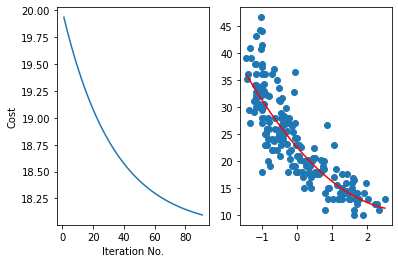

Error =  18.096463322898266 theta0 =  23.767500000000002 theta1 =  -16.009667283677445 theta2 =  9.205710828417496 



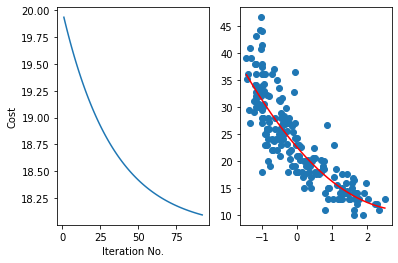

Error =  18.092546084818547 theta0 =  23.767500000000002 theta1 =  -16.05342790782704 theta2 =  9.249144504962661 



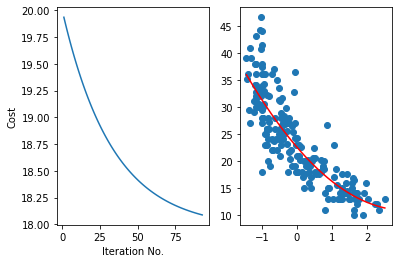

Error =  18.088744608334355 theta0 =  23.767500000000002 theta1 =  -16.09653707948284 theta2 =  9.291931596193974 



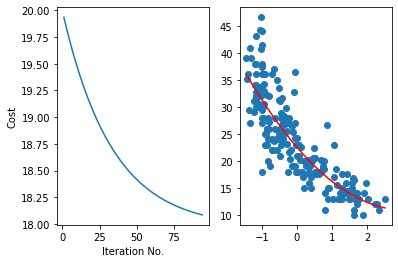

Error =  18.085055472477467 theta0 =  23.767500000000002 theta1 =  -16.139004496640702 theta2 =  9.334081727650913 



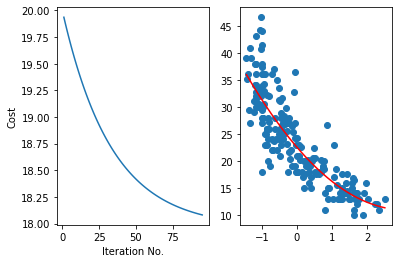

Error =  18.08147535737557 theta0 =  23.767500000000002 theta1 =  -16.180839712925064 theta2 =  9.375604381580171 



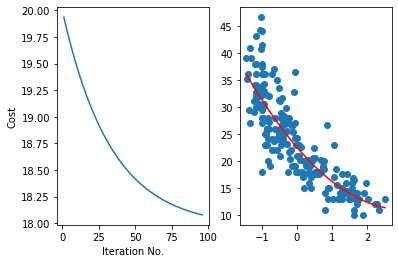

Error =  18.078001041264688 theta0 =  23.767500000000002 theta1 =  -16.22205213973815 theta2 =  9.416508899068809 



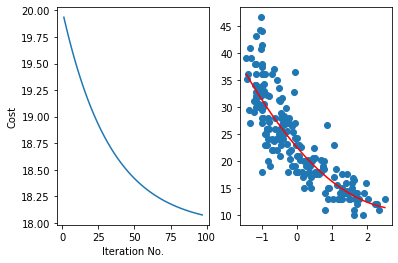

Error =  18.07462939758988 theta0 =  23.767500000000002 theta1 =  -16.262651048377204 theta2 =  9.456804482145673 



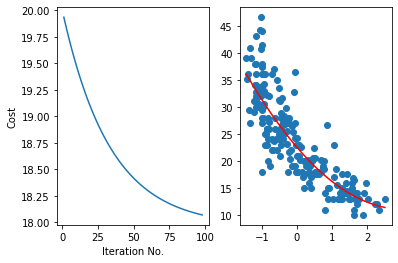

Error =  18.071357392191693 theta0 =  23.767500000000002 theta1 =  -16.302645572120202 theta2 =  9.496500195851512 



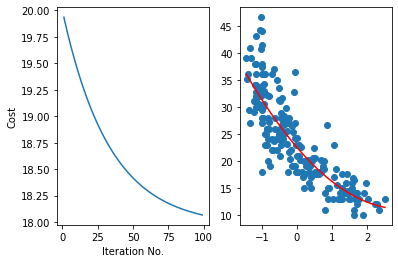

Error =  18.06818208057565 theta0 =  23.767500000000002 theta1 =  -16.342044708280483 theta2 =  9.535604970278282 



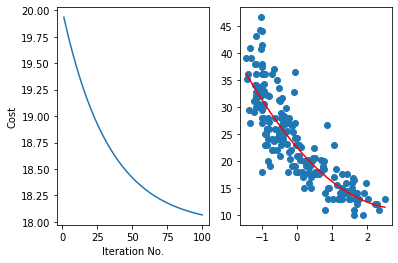

Error =  18.065100605262508 theta0 =  23.767500000000002 theta1 =  -16.380857320230845 theta2 =  9.574127602578091 



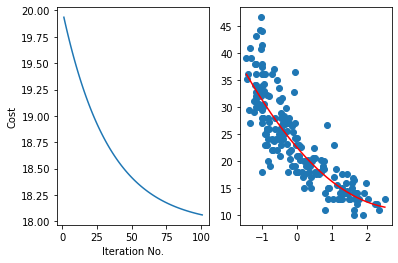

Error =  18.06211019321679 theta0 =  23.767500000000002 theta1 =  -16.419092139397467 theta2 =  9.612076758942244 



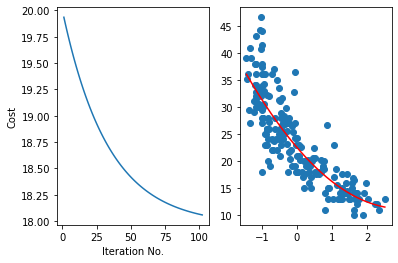

Error =  18.05920815335133 theta0 =  23.767500000000002 theta1 =  -16.45675776722416 theta2 =  9.64946097655081 



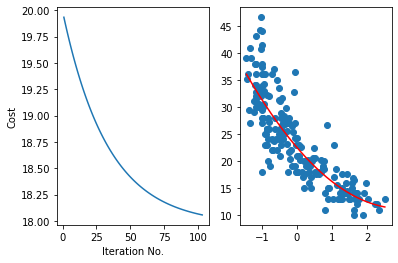

Error =  18.056391874105547 theta0 =  23.767500000000002 theta1 =  -16.493862677107387 theta2 =  9.686288665493185 



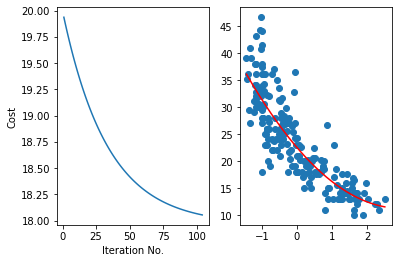

Error =  18.05365882109527 theta0 =  23.767500000000002 theta1 =  -16.530415216302462 theta2 =  9.722568110660058 



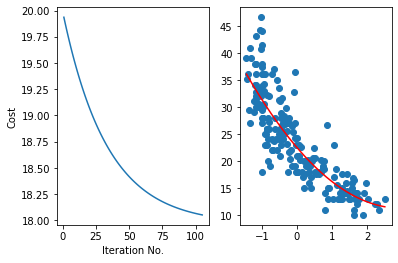

Error =  18.051006534832045 theta0 =  23.767500000000002 theta1 =  -16.56642360780139 theta2 =  9.758307473607205 



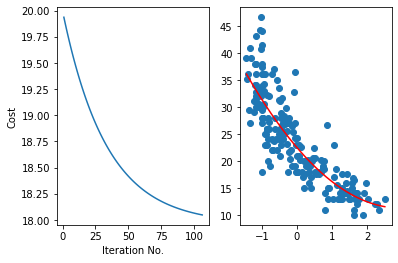

Error =  18.04843262850984 theta0 =  23.767500000000002 theta1 =  -16.601895952182723 theta2 =  9.79351479439154 



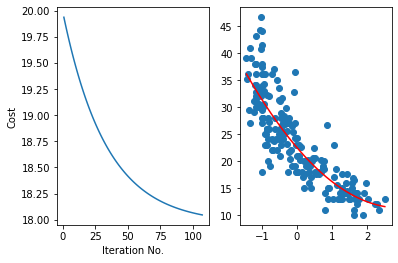

Error =  18.045934785857117 theta0 =  23.767500000000002 theta1 =  -16.636840229433915 theta2 =  9.828197993379844 



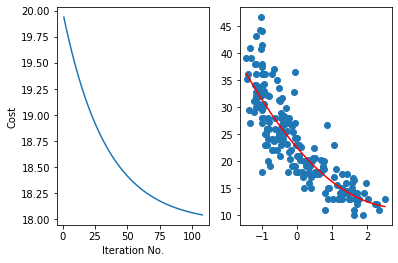

Error =  18.04351075905245 theta0 =  23.767500000000002 theta1 =  -16.671264300746515 theta2 =  9.862364873030552 



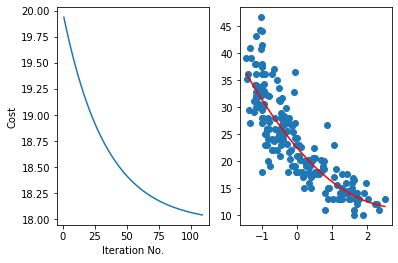

Error =  18.04115836670165 theta0 =  23.767500000000002 theta1 =  -16.705175910284655 theta2 =  9.896023119649028 



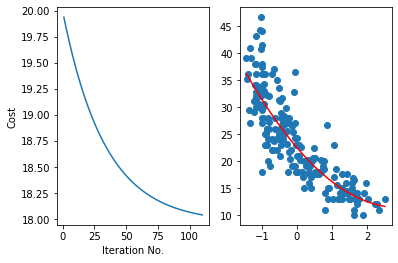

Error =  18.03887549187475 theta0 =  23.767500000000002 theta1 =  -16.73858268692721 theta2 =  9.9291803051167 



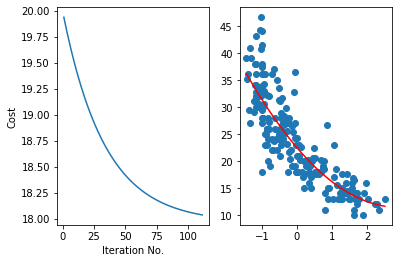

Error =  18.036660080200974 theta0 =  23.767500000000002 theta1 =  -16.771492145984006 theta2 =  9.961843888594462 



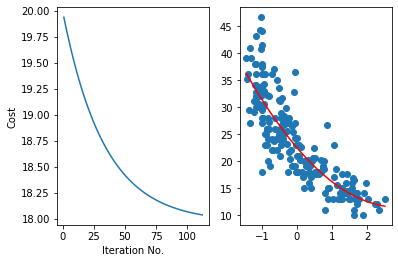

Error =  18.03451013801995 theta0 =  23.767500000000002 theta1 =  -16.8039116908865 theta2 =  9.994021218200704 



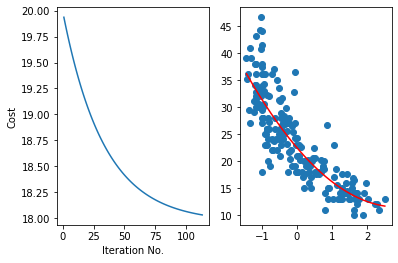

Error =  18.032423730587677 theta0 =  23.767500000000002 theta1 =  -16.835848614853287 theta2 =  10.025719532664386 



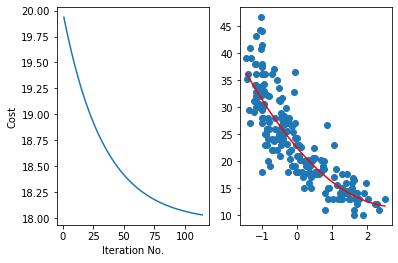

Error =  18.030398980335377 theta0 =  23.767500000000002 theta1 =  -16.86731010253079 theta2 =  10.056945962953476 



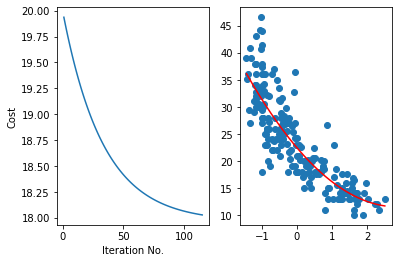

Error =  18.028434065179894 theta0 =  23.767500000000002 theta1 =  -16.898303231609574 theta2 =  10.087707533879168 



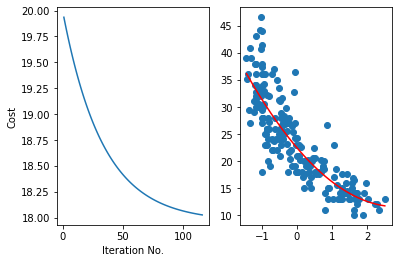

Error =  18.026527216883988 theta0 =  23.767500000000002 theta1 =  -16.92883497441654 theta2 =  10.118011165676206 



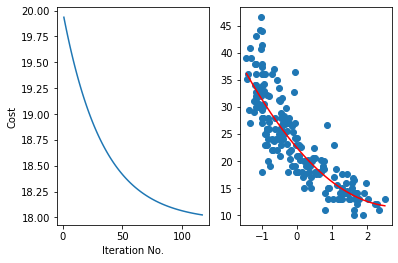

Error =  18.024676719465067 theta0 =  23.767500000000002 theta1 =  -16.958912199483457 theta2 =  10.147863675559677 



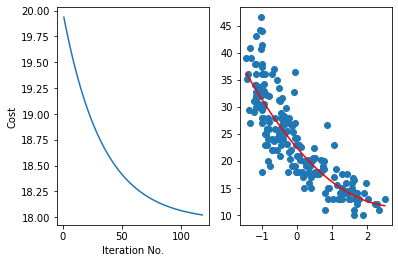

Error =  18.022880907650993 theta0 =  23.767500000000002 theta1 =  -16.988541673092143 theta2 =  10.177271779258652 



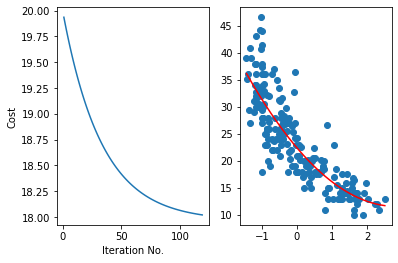

Error =  18.021138165381497 theta0 =  23.767500000000002 theta1 =  -17.01773006079661 theta2 =  10.206242092526962 



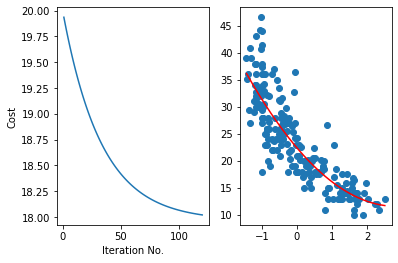

Error =  18.019446924353847 theta0 =  23.767500000000002 theta1 =  -17.046483928922587 theta2 =  10.234781132631527 



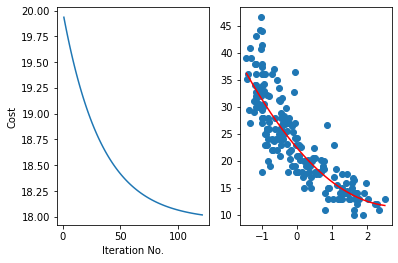

Error =  18.01780566261155 theta0 =  23.7675 theta1 =  -17.074809746044703 theta2 =  10.262895319818476 



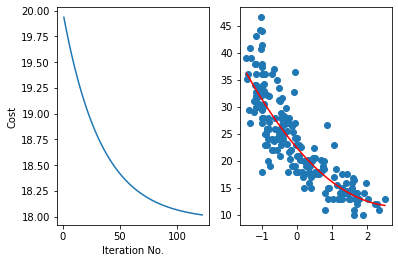

Error =  18.016212903174736 theta0 =  23.767500000000002 theta1 =  -17.102713884441677 theta2 =  10.290590978757491 



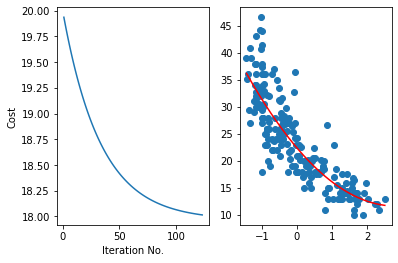

Error =  18.01466721271099 theta0 =  23.767500000000002 theta1 =  -17.130202621529843 theta2 =  10.317874339964613 



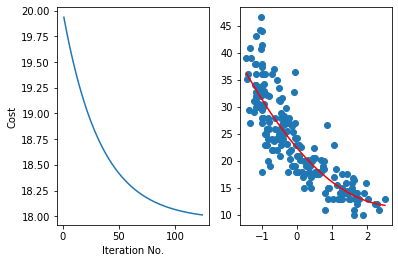

Error =  18.013167200245526 theta0 =  23.767500000000002 theta1 =  -17.157282141275356 theta2 =  10.34475154120389 



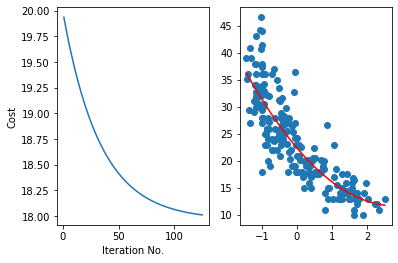

Error =  18.011711515909422 theta0 =  23.767500000000002 theta1 =  -17.18395853558535 theta2 =  10.371228628868149 



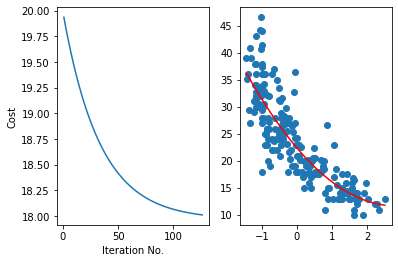

Error =  18.010298849724858 theta0 =  23.767500000000002 theta1 =  -17.210237805678396 theta2 =  10.397311559339215 



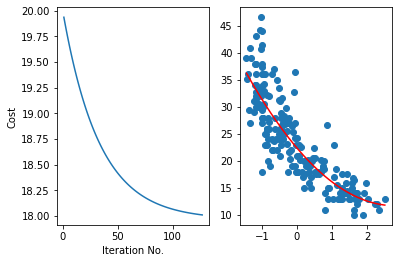

Error =  18.00892793042628 theta0 =  23.767500000000002 theta1 =  -17.236125863434555 theta2 =  10.423006200327874 



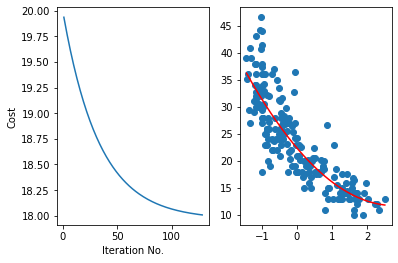

Error =  18.007597524316356 theta0 =  23.767500000000002 theta1 =  -17.261628532725343 theta2 =  10.448318332193907 



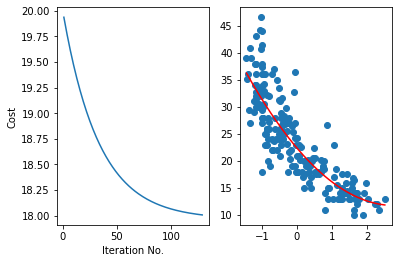

Error =  18.0063064341558 theta0 =  23.767500000000002 theta1 =  -17.286751550723885 theta2 =  10.473253649246441 



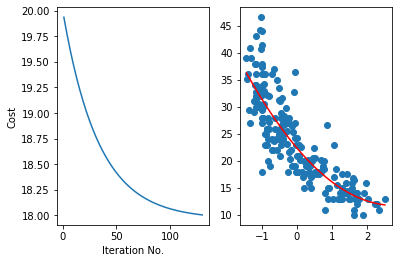

Error =  18.005053498085932 theta0 =  23.767500000000002 theta1 =  -17.311500569195573 theta2 =  10.497817761024987 



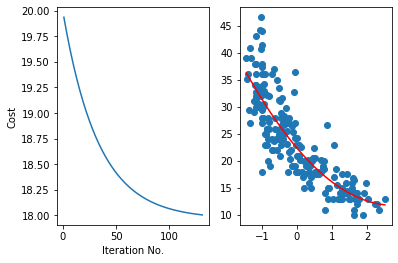

Error =  18.003837588583153 theta0 =  23.767500000000002 theta1 =  -17.335881155769506 theta2 =  10.522016193561361 



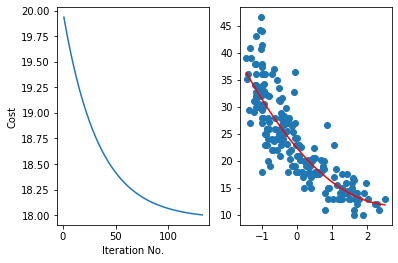

Error =  18.00265761144425 theta0 =  23.767500000000002 theta1 =  -17.35989879519101 theta2 =  10.545854390622855 



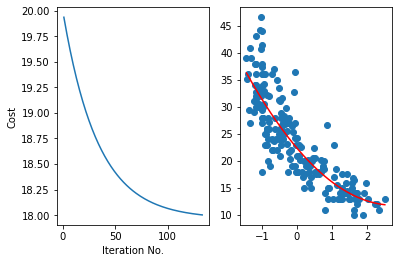

Error =  18.00151250480172 theta0 =  23.767500000000002 theta1 =  -17.383558890555495 theta2 =  10.569337714936871 



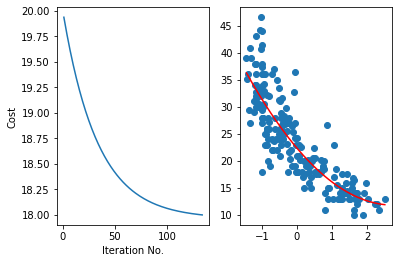

Error =  18.00040123816823 theta0 =  23.767500000000002 theta1 =  -17.40686676452396 theta2 =  10.592471449397356 



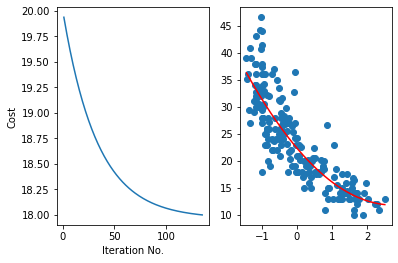

Error =  17.99932281150921 theta0 =  23.767500000000002 theta1 =  -17.429827660520406 theta2 =  10.61526079825325 



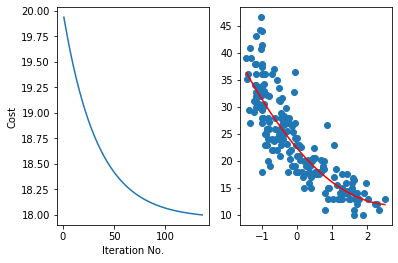

Error =  17.99827625434298 theta0 =  23.767500000000002 theta1 =  -17.452446743911405 theta2 =  10.637710888279258 



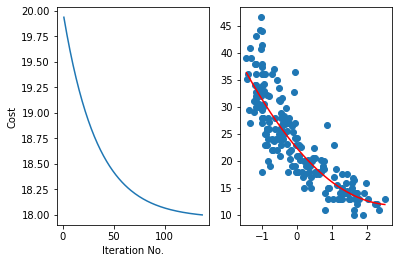

Error =  17.997260624867348 theta0 =  23.767500000000002 theta1 =  -17.474729103168123 theta2 =  10.659826769929186 



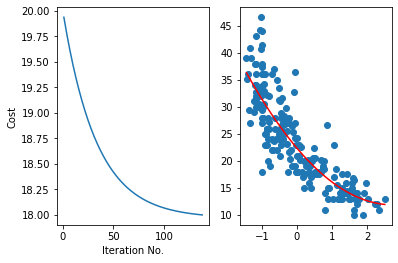

Error =  17.99627500911215 theta0 =  23.767500000000002 theta1 =  -17.49667975101104 theta2 =  10.681613418472107 



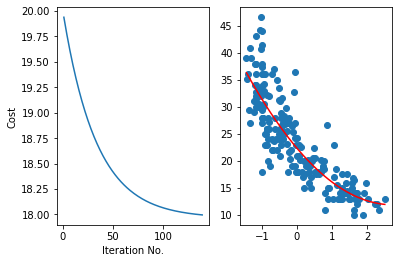

Error =  17.995318520116697 theta0 =  23.767500000000002 theta1 =  -17.518303625537637 theta2 =  10.703075735111621 



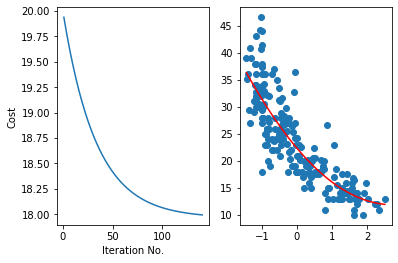

Error =  17.994390297131616 theta0 =  23.767500000000002 theta1 =  -17.539605591333277 theta2 =  10.724218548088446 



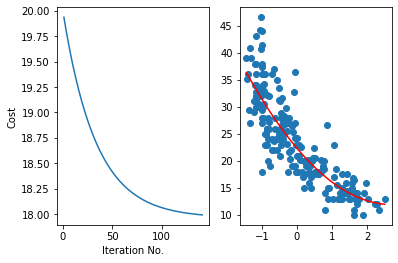

Error =  17.993489504844288 theta0 =  23.767500000000002 theta1 =  -17.560590440565573 theta2 =  10.745046613766595 



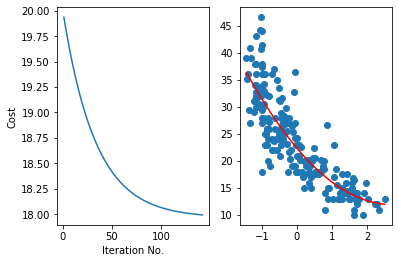

Error =  17.99261533262709 theta0 =  23.767500000000002 theta1 =  -17.581262894062434 theta2 =  10.765564617703381 



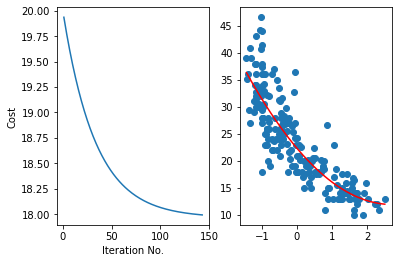

Error =  17.991766993807964 theta0 =  23.767500000000002 theta1 =  -17.601627602374094 theta2 =  10.785777175703505 



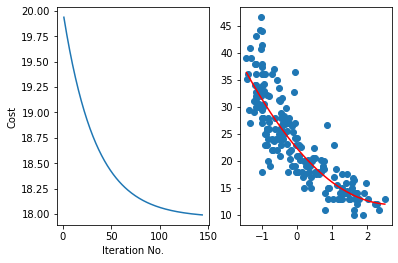

Error =  17.990943724962435 theta0 =  23.767500000000002 theta1 =  -17.621689146819318 theta2 =  10.80568883485744 



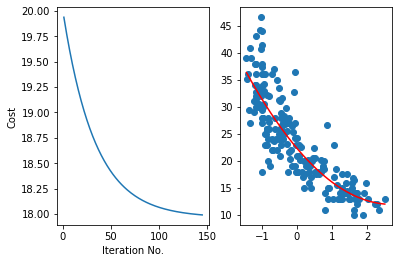

Error =  17.99014478522664 theta0 =  23.767500000000002 theta1 =  -17.641452040516015 theta2 =  10.825304074564363 



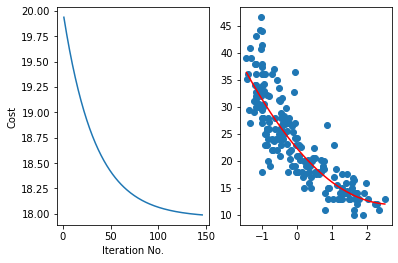

Error =  17.98936945563062 theta0 =  23.767500000000002 theta1 =  -17.660920729396544 theta2 =  10.844627307539849 



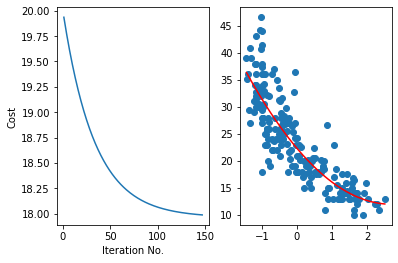

Error =  17.988617038451263 theta0 =  23.767500000000002 theta1 =  -17.68009959320788 theta2 =  10.863662880808588 



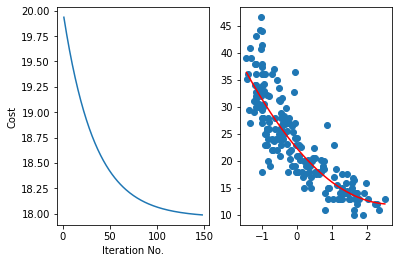

Error =  17.987886856584502 theta0 =  23.767500000000002 theta1 =  -17.698992946496897 theta2 =  10.88241507668229 



In [ ]:
iteration_Nos = range(1, 150)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X2));

    plt.clf()
    plt.subplot(1,2,1);
    plt.plot(range(1, i), err_F[1:i])
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')
    
    plt.subplot(1,2,2);
    plt.scatter(X1, Y)
    X_R = np.arange(np.min(train_setx['weight']),np.max(train_setx['weight']), 0.1);
    # create a x axis with  min to max
    X_R2 = np.square(X_R);
    X_R = (X_R-M1)/S1;
    X_R2 = (X_R2 - M2)/S2;
    plt.plot(X_R, theta0 + theta1*X_R+ theta2*X_R2, 'r');
    plt.show()
    #ploting the red line
    print('Error = ',h, 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2,'\n')

#Assignment 4.1 (1):
Write a code from first principles to perform linear regression using these four variables: Weight, Weight^2, Displacement, Displacement^2
Plot the square root of cost function for training and test data for 500 iterations. You should be able to reach an error of about 4 mpg.

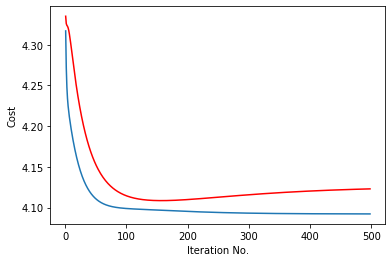



Error =  4.229135054806245 theta0 =  23.767500000000002 theta1 =  -16.259731894349137 theta2 =  10.421983858612018 theta3 =  -2.5287658297941453 theta4 =  1.5250158303858794 



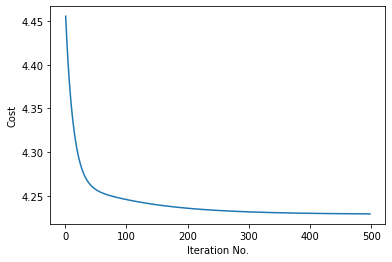

In [ ]:
#Create the test set
#copy alls rows after 200. Extract the mpg row as the target (test_sety)
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

#initialization
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);
theta3 = random.uniform(-1,1);
theta4 = random.uniform(-1,1);

#normalization
import numpy as np
X1 = train_setx['weight'];
X2 = np.square(train_setx['weight'])
X3 = train_setx['displacement'];
X4 = np.square(train_setx['displacement'])

M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;

M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

M3= np.mean(X3);
S3 = np.std(X3);
X3 = (X3 - M3)/S3;

M4= np.mean(X4);
S4 = np.std(X4);
X4 = (X4 - M4)/S4;

Y = train_sety
L = len(X1)
alpha = 0.5;

#compututing cost functio and updating weights
iteration_Nos = range(1, 500)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X2));
    theta3 = theta3 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X3));
    theta4 = theta4 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 +theta3*X3 +theta4*X4 - Y),X4));

    plt.clf()
    plt.plot(range(1, i), np.sqrt(err_F[1:i]))
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')


    #ploting the red line
print('Error = ',np.sqrt(h), 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4,'\n')

In [ ]:
#Testing set using theta from training set

#normalization of test set
x1 = test_setx['weight'];
x2 = np.square(test_setx['weight'])
x3 = test_setx['displacement'];
x4 = np.square(test_setx['displacement'])

m1= np.mean(x1);
s1 = np.std(x1);
x1 = (x1 - m1)/s1;

m2= np.mean(x2);
s2 = np.std(x2);
x2 = (x2 - m2)/s2;

m3= np.mean(x3);
s3 = np.std(x3);
x3 = (x3 - m3)/s3;

m4= np.mean(x4);
s4 = np.std(x4);
x4 = (x4 - m4)/s4;

y = test_sety
l = len(x1)
#testing set error
h3 = ((1/l)*np.sum(np.square(theta0 + theta1*x1 + theta2*x2 + theta3*x3 + theta4*x4 - y)))
print('Testing set error using trained theta vector= ',np.sqrt(h3),'\n', 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4, '\n')

Testing set error using trained theta vector=  4.071951433512015 
 theta0 =  23.767500000000002 theta1 =  -16.259731894349137 theta2 =  10.421983858612018 theta3 =  -2.5287658297941453 theta4 =  1.5250158303858794 



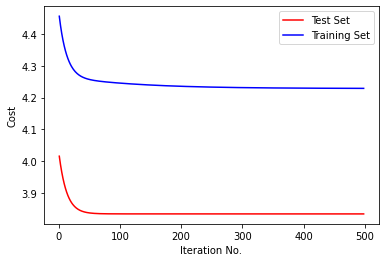

Training Set:  Error =  4.229135054806245 theta0 =  23.767500000000002 theta1 =  -16.259731894349137 theta2 =  10.421983858612018 theta3 =  -2.5287658297941453 theta4 =  1.5250158303858794 

Testing Set:  Error =  3.8348045201795538 theta0 =  23.25909090909091 theta1 =  -7.356358264845451 theta2 =  4.1896002239434385 theta3 =  -6.585379505562711 theta4 =  3.6394500760110002 



In [ ]:
#Training set vs testing set
th0 = random.uniform(-1,1);
th1 = random.uniform(-1,1);
th2 = random.uniform(-1,1);
th3 = random.uniform(-1,1);
th4 = random.uniform(-1,1);

iteration_Nos = range(1, 500)
err_F2 = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h2 = ((1/l)*np.sum(np.square(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y)))
    err_F2[i-1] = h2;
    th0 = th0 - (alpha/l)*np.sum((2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y)));
    th1 = th1 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x1));
    th2 = th2 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x2));
    th3 = th3 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x3));
    th4 = th4 - (alpha/l)*np.sum(np.multiply(2*(th0 + th1*x1 + th2*x2 + th3*x3 + th4*x4 - y),x4));

plt.plot(range(1, i), np.sqrt(err_F2[1:i]),'r',label='Test Set')
plt.plot(range(1, i), np.sqrt(err_F[1:i]),'b',label='Training Set')
plt.legend(loc="upper right")
plt.xlabel('Iteration No.')
plt.ylabel('Cost')
plt.show()

 #ploting the red line
print('Training Set: ','Error = ',np.sqrt(h), 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2, 'theta3 = ', theta3, 'theta4 = ', theta4, '\n')
print('Testing Set: ','Error = ',np.sqrt(h2), 'theta0 = ', th0, 'theta1 = ', th1, 'theta2 = ', th2, 'theta3 = ', th3, 'theta4 = ', th4, '\n')


#Assignment 4.2 (0.8):
Write a code to use SKLearn Libraries to perform the same linear regression using 4 variables given in 4.1.

Use:

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


#Assignment 4.3 (0.2):
Get the predicted mpg for the fourth row of the test set. How does it compare with the actual mpg?

In [ ]:

x_Train = pd.DataFrame()
x_Train['weight'] = train_Set['weight']
x_Train['displacement'] = train_Set['displacement']
x_Train['weight_sqr'] = np.square(train_Set['weight'])
x_Train['displacement_Sqr'] = np.square(train_Set['displacement'])

x_Test = pd.DataFrame()
x_Test['weight'] = test_Set['weight']
x_Test['displacement'] = test_Set['displacement']
x_Test['weight_sqr'] = np.square(test_Set['weight'])
x_Test['displacement_Sqr'] = np.square(test_Set['displacement'])

In [ ]:

from sklearn.linear_model import LinearRegression  #import LinearRegression module
from sklearn.metrics import mean_squared_error, r2_score  #import mean squared error

lin_model = LinearRegression()
lin_model.fit(x_Train, train_sety)  #apply linear regression on x_train dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = lin_model.predict(x_Train)
rmse = (np.sqrt(mean_squared_error(train_sety, y_train_predict)))
r2 = r2_score(train_sety, y_train_predict)    #use r2_score function on train_sety and y_train_predict


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(x_Test)    #perform above steps for test set
rmse = (np.sqrt(mean_squared_error(test_sety, y_test_predict)))
r2 = r2_score(test_sety, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

predict=theta0+theta1*x1+theta2*x2+theta3*x3+theta4*x4
predict=predict.reset_index(drop=True)
actual=y.reset_index(drop=True)
print('Predicted mpg: ',predict[4])
print('Actual mpg: ',actual[4])

The model performance for training set
--------------------------------------
RMSE is 4.228672625096677
R2 score is 0.7369947578309572


The model performance for testing set
--------------------------------------
RMSE is 4.1143369438992465
R2 score is 0.6846617626830944
Predicted mpg:  31.71700579048886
Actual mpg:  27.0


#Assignment 4.4 (1 )
First go through the normal equation method as discussed here: https://youtu.be/_se0d7m_Cpw?t=1493

Find the theta vector for linear regression using these four variables: Weight, Weight^2, Displacement, Displacement^2 using normal equation method. Compare it with results obtained in 4.1 

In [ ]:
#Normal equation for training set
I=np.ones([len(Y)])
X=np.array([I,X1,X2,X3,X4])
XT=np.transpose(X)
ntheta=np.dot(np.dot(np.linalg.inv(np.dot(X,XT)),X),Y)
print('Original theta: ','\n','[ ',  theta0,' ', theta1,' ', theta2,' ', theta3,' ', theta4,' ]', '\n','\n')
print('Normal Equation theta: ',ntheta)

#Normal equation for testing set

i=np.ones([len(y)])
x=np.array([i,x1,x2,x3,x4])
xt=np.transpose(x)
ntheta2=np.dot(np.dot(np.linalg.inv(np.dot(x,xt)),x),y)
print('Original theta: ','\n','[ ',  th0,' ', th1,' ', th2,' ', th3,' ', th4,' ]', '\n','\n')
print('Normal Equation theta: ',ntheta2)

Original theta:  
 [  23.767500000000002   -16.259731894349137   10.421983858612018   -2.5287658297941453   1.5250158303858794  ] 
 

Normal Equation theta:  [ 23.7675     -17.07228129  11.14515132  -1.97909389   1.05771829]
Original theta:  
 [  23.25909090909091   -7.356358264845451   4.1896002239434385   -6.585379505562711   3.6394500760110002  ] 
 

Normal Equation theta:  [23.25909091 -7.37833321  4.20862862 -6.57022854  3.62688897]
